In [28]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [31]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [32]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [33]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [34]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [35]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [36]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first().date
most_recent

'2017-08-23'

Text(0, 0.5, 'Inches')

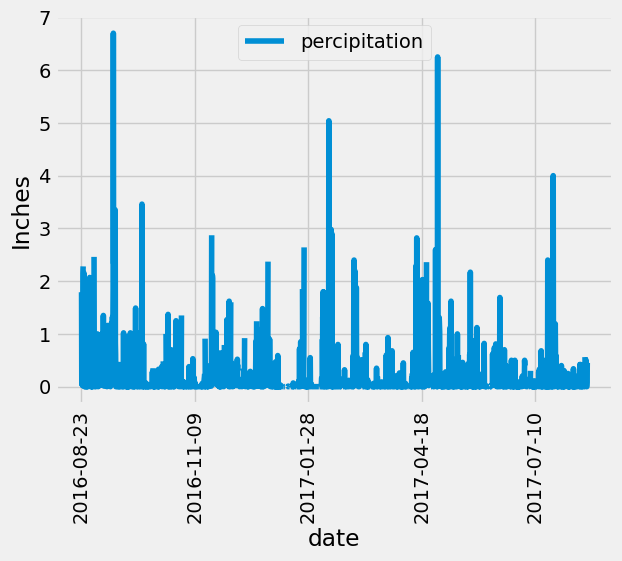

In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days = 365)
one_year_ago

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, (measurement.prcp)).filter(measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns = ['date', 'percipitation']).set_index('date')

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(rot = 90)
plt.ylabel('Inches')


In [38]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(station).count()
stations

9

In [51]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_qty = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
stations_qty                                                                                                                        

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

Station 'USC00519281' has the most rows or obersations with 2,772.

In [55]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()
most_active

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

Of the tempuratures recorded at station USC00519281, the lowest was 54, the highest was 85 and the average of all 
tempuratures recorded is 71.66

Text(0.5, 0, 'Temperature')

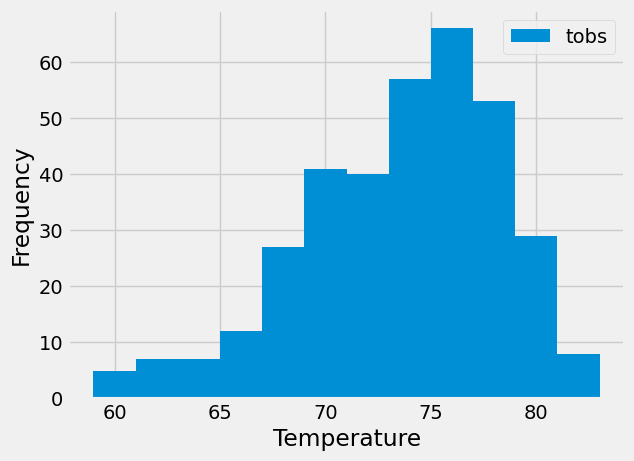

In [64]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active = session.query(measurement.tobs).filter(measurement.station=='USC00519281', measurement.date >= one_year_ago).all()
most_active_df = pd.DataFrame(most_active)

most_active_df.plot(kind = 'hist', bins =12)
plt.xlabel('Temperature')

# Close session

In [65]:
# Close Session
session.close()